<a href="https://colab.research.google.com/github/404himel/LSTM/blob/main/rnn_and_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt


In [10]:
# Load the IMDb dataset
vocab_size = 10000  # Consider top 10,000 words in the dataset
max_length = 100    # Maximum length of each review

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure all sequences are of the same length
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (25000, 200)
Test data shape: (25000, 200)


In [11]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

# Build RNN model
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=vocab_size, output_dim=64))  # Removed input_length as it's deprecated
model_rnn.add(SimpleRNN(units=128))
model_rnn.add(Dense(1, activation='sigmoid'))

# Compile the RNN model
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Provide input shape to build the model
# For example, let's assume max_length = 100
import numpy as np
max_length = 100
dummy_input = np.random.randint(0, vocab_size, (1, max_length))  # Random input with the appropriate shape
model_rnn.predict(dummy_input)  # This will "build" the model by giving it input data

# Summary of the RNN model
model_rnn.summary()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (1, 100, 64)                │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (1, 128)                    │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (1, 1)                      │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 664,833 (2.54 MB)

 Trainable params: 664,833 (2.54 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
import numpy as np

# Assume vocab_size and max_length are defined
vocab_size = 10000  # For example
max_length = 100    # For example

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=vocab_size, output_dim=64))  # Removed input_length as it's deprecated
model_lstm.add(LSTM(units=128))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the LSTM model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Provide input shape to build the model
dummy_input = np.random.randint(0, vocab_size, (1, max_length))  # Random input with the appropriate shape
model_lstm.predict(dummy_input)  # This will "build" the model by giving it input data

# Summary of the LSTM model
model_lstm.summary()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (1, 100, 64)                │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (1, 128)                    │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (1, 1)                      │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 738,945 (2.82 MB)

 Trainable params: 738,945 (2.82 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Train the RNN model
history_rnn = model_rnn.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))




Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5268 - loss: 0.6931 - val_accuracy: 0.6192 - val_loss: 0.6579
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.6848 - loss: 0.5995 - val_accuracy: 0.7952 - val_loss: 0.4593
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.7906 - loss: 0.4643 - val_accuracy: 0.7055 - val_loss: 0.5618
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.8071 - loss: 0.4273 - val_accuracy: 0.8124 - val_loss: 0.4458
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.8642 - loss: 0.3328 - val_accuracy: 0.8275 - val_loss: 0.4293
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.9020 - loss: 0.2567 - val_accuracy: 0.8306 - val_loss: 0.4034
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.8931 - loss: 0.2626 - val_accuracy: 0.7618 - val_loss: 0.5227
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.7468 - loss: 0.5010 - 

In [15]:
# Train the LSTM model
history_lstm = model_lstm.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.7119 - loss: 0.5436 - val_accuracy: 0.8613 - val_loss: 0.3254
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8891 - loss: 0.2837 - val_accuracy: 0.8624 - val_loss: 0.3314
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9177 - loss: 0.2209 - val_accuracy: 0.8686 - val_loss: 0.3416
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9426 - loss: 0.1561 - val_accuracy: 0.8624 - val_loss: 0.3790
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9609 - loss: 0.1129 - val_accuracy: 0.8539 - val_loss: 0.3891
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9685 - loss: 0.0903 - val_accuracy: 0.8414 - val_loss: 0.4764
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9767 - loss: 0.0725 - val_accuracy: 0.8517 - val_loss: 0.5123
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9682 - loss: 0.0921 - val

In [16]:
# Evaluate RNN model
rnn_accuracy = model_rnn.evaluate(X_test, y_test)
print(f"RNN Test Accuracy: {rnn_accuracy[1]*100:.2f}%")

# Evaluate LSTM model
lstm_accuracy = model_lstm.evaluate(X_test, y_test)
print(f"LSTM Test Accuracy: {lstm_accuracy[1]*100:.2f}%")


782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7843 - loss: 0.6790
RNN Test Accuracy: 78.74%
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8496 - loss: 1.6031
LSTM Test Accuracy: 85.00%


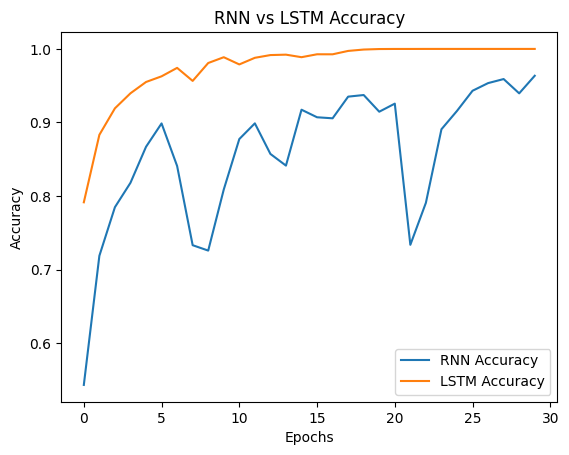

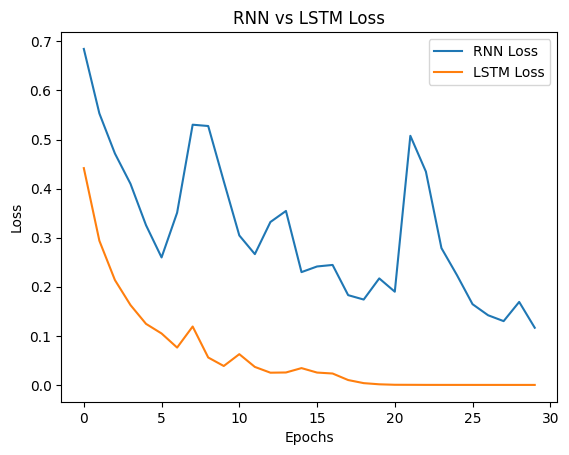

In [17]:
# Plot the accuracy of RNN and LSTM models
plt.plot(history_rnn.history['accuracy'], label='RNN Accuracy')
plt.plot(history_lstm.history['accuracy'], label='LSTM Accuracy')
plt.title('RNN vs LSTM Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the loss of RNN and LSTM models
plt.plot(history_rnn.history['loss'], label='RNN Loss')
plt.plot(history_lstm.history['loss'], label='LSTM Loss')
plt.title('RNN vs LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
